In [1]:
import goobergrad.nn as nn
from goobergrad import eval
from goobergrad.nn import Value

In [2]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

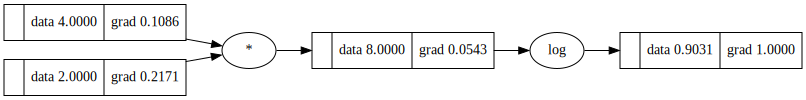

In [3]:
a = nn.Value(4.0)
b = a * 2
c = b.log()
c.backward()
draw_dot(c)


In [4]:
model = nn.MLP([1,5, 4])

In [5]:
model.layers[1].neurons[0]._activation

False

0.33141758114969444
0.3964481851450656
0.1546460720153608
0.42037160740192403


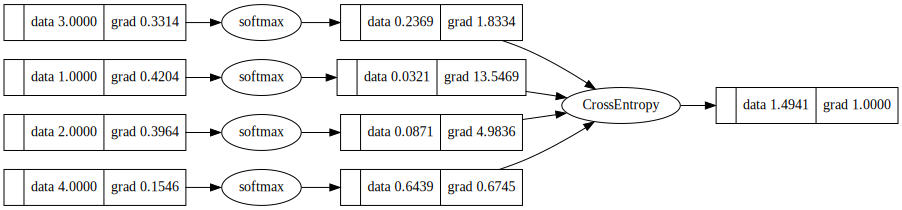

In [6]:
ypred = [Value(1.0), Value(2.0), Value(3.0), Value(4.0)]
ytrue = (1, 0, 0, 0)

ypred = nn.softmax(ypred)

loss = eval.CrossEntropy(ypred, ytrue)
loss.backward()

draw_dot(loss)

In [ ]:
ypred

[Value(0.03205860328008499),
 Value(0.08714431874203257),
 Value(0.23688281808991013),
 Value(0.6439142598879722)]